# 1. Analysis of Obama's Speeches

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


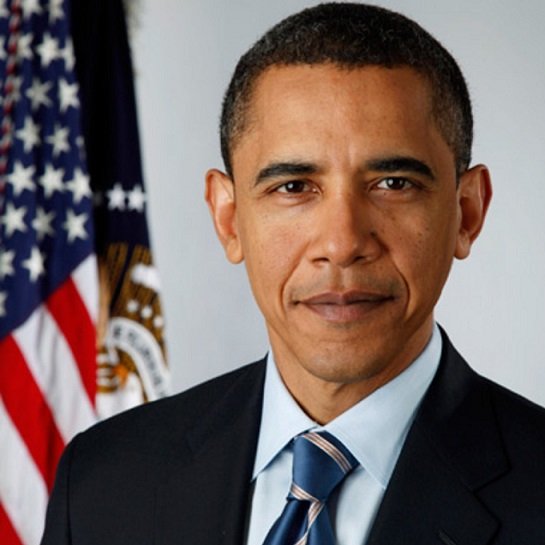

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img= cv2.imread('/content/drive/My Drive/obama.jpg') 
cv2_imshow(img) 

We are provided with above 400 speeches of President Barack Obama in PDF format. The aim is to:

* Analyze the speeches using text mining concepts
*  Timeline study of the speeches 

## Import packages and data

In [3]:
# for parsing and reading pdfs
!pip install tika

# to check for diversity in speeches
!pip install lexical_diversity

# for sentiment analysis
import nltk
nltk.download('vader_lexicon')

  Created wheel for tika: filename=tika-1.24-cp36-none-any.whl size=32884 sha256=7b136890545122fd636ad3e86173bd8c098eaba0977ad206f83e6ebd868cb9a2
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika
     |████████████████████████████████| 122kB 2.8MB/s 
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
import re,os
import pandas as pd
import numpy as np
from tika import parser
import matplotlib.pyplot as plt
from pprint import pprint
import datetime
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from lexical_diversity import lex_div as ld
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Here, we are loading the pdfs containing speeches from the drive. We will read each of the files, and save them, along with the contents, in a dataframe.
This dataframe is then saved as csv, for later use, as reading the pdfs is time consuming.

In [ ]:
# Ran the first time to read in the pdfs
# The pdfs are now accessible from the csv
'''speech_path= '/content/drive/My Drive/Obama speeches pdf'

pdf_files= os.listdir(speech_path)
#pdf_files

speeches= {'date': [], 'header': [], 'content':[]}
#count = 0
for fl in pdf_files:
    #data= PyPDF2.PdfFileReader(f)
    #print(count)
    #count = count +1
    data= parser.from_file(speech_path+ '/'+ fl)['content']
    data = re.sub("\\n","",data)
    data = re.sub("AAmmeerriiccaannRRhheettoorriicc..ccoomm   AmericanRhetoric.com","", data)
    data = re.sub("(.*audio)","", data)
    data = re.sub("Page ..","", data)
    #print(fl)
    speeches['date'].append(re.findall("(.+?)_", fl)[0])
    speeches['content'].append(data)
    if(fl != '20 May 2011_Barack Obama and Benyamin Netanyahu Joint Remarks.pdf'):
      speeches['header'].append(re.findall("- (.+?).pdf", fl)[0])      
    else:
      speeches['header'].append("Joint Remarks")

spch_df= pd.DataFrame(speeches)
# Writing the dataframe as csv for further
spch_df.to_csv('/content/drive/My Drive/speeches_df.csv', header= True, index= False) '''

In [5]:
# And reading it as required
spch_df= pd.read_csv('/content/drive/My Drive/Docs&Data/speeches_df.csv', index_col= "Unnamed: 0")
print("The size of the dataframe: ", spch_df.shape)

The size of the dataframe:  (431, 3)


In [6]:
spch_df.head()

,date,header,content
0,27 Jul 2004,2004 DNC Address,"On behalf of the great state of Illinois, cro..."
1,06 Jan 2005,Senate Speech on Ohio Electoral Vote,"Senator Obama: Thank you very much, Mr. Presi..."
2,04 Jun 2005,Knox College Commencement,"Good morning President Taylor, Board of Trust..."
3,25 Oct 2005,Rosa Parks,"] Mr. President, today the nation mourns a gen..."
4,15 Dec 2005,Senate Floor Speech on the Patriot Act,"Thank you very much, Mr. President. You know,..."


## Text Cleaning

In [7]:
spch_df.content.replace(to_replace = ["\[", "\]", "\."],value= "", regex= True, inplace= True)

In [8]:
spch_df.content= spch_df.content.str.lower()
spch_df.head(3)

,date,header,content
0,27 Jul 2004,2004 DNC Address,"on behalf of the great state of illinois, cro..."
1,06 Jan 2005,Senate Speech on Ohio Electoral Vote,"senator obama: thank you very much, mr presid..."
2,04 Jun 2005,Knox College Commencement,"good morning president taylor, board of trust..."


## Analysis of the speeches

In [15]:
tokenizer= RegexpTokenizer("[a-zA-Z0-9'’]+")
#tokens= [tokenizer.tokenize(x.lower()) for x in spch_df['content']]
tokens= [tokenizer.tokenize(x) for x in spch_df['content']]

We convert the speeches to lowercase for tokenizing, after ensuring that important words do not get missed out. For example, America has been mentioned in full, and not as US or USA.

In [10]:
tokens_no_stopwords_all= [token for x in tokens for token in x if token not in STOPWORDS]
tokens_no_stopwords_all[0: 10] # displaying a few tokens, which are not stopwords

['behalf',
 'great',
 'state',
 'illinois',
 'crossroads',
 'nation',
 'land',
 'lincoln',
 'let',
 'express']

We check for the most common words. If certain words did not get captured in the STOPWORDS list, we need to update the list to capture those also.

In [39]:
word_count= Counter(tokens_no_stopwords_all)
word_count.most_common(10)

[('people', 7123),
 ('us', 5146),
 ('president', 4261),
 ('now', 4013),
 ('one', 3821),
 ('make', 3630),
 ('think', 3304),
 ('want', 3156),
 ('know', 3075),
 ('world', 3071)]

In [40]:
new_stpwrds= ["will", "it’s", "that’s", "going", "americanrhetoriccom", "we’ve", "don’t", "i’m", "they’re", "you’ve", 
              "can’t", "we’re", "you’re", "i’ve", "mr", "got", "go", "say", "may", "obama", "there’s", "aammeerriiccaannrrhheettoorriiccccoomm"] 
[STOPWORDS.add(n) for n in new_stpwrds]
tokens_no_stopwords_all= [token for x in tokens for token in x if token not in STOPWORDS]

In [41]:
word_count= Counter(tokens_no_stopwords_all)
word_count.most_common(20)

[('people', 7123),
 ('us', 5146),
 ('president', 4261),
 ('now', 4013),
 ('one', 3821),
 ('make', 3630),
 ('think', 3304),
 ('want', 3156),
 ('know', 3075),
 ('world', 3071),
 ('time', 2857),
 ('work', 2834),
 ('states', 2681),
 ('america', 2644),
 ('united', 2621),
 ('new', 2595),
 ('right', 2569),
 ('american', 2567),
 ('country', 2525),
 ('years', 2459)]

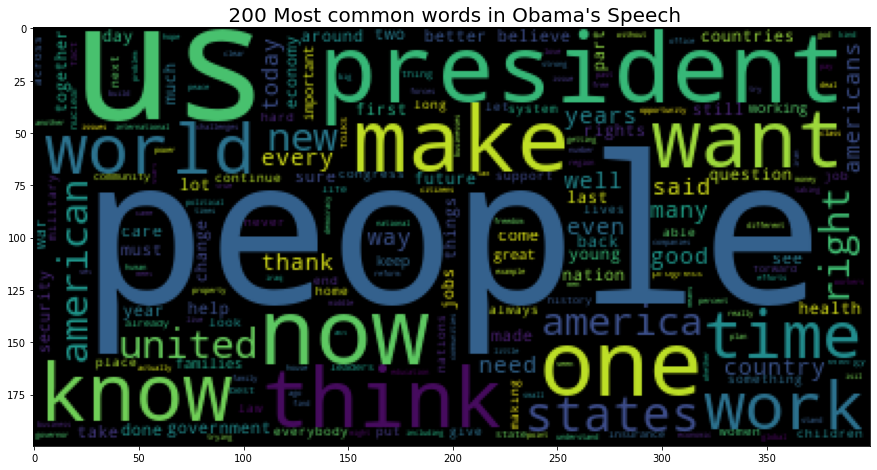

In [22]:
rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud(random_state= 125)
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 15));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's Speech", fontdict= {'fontsize': 20} );

From the wordcloud above, we see that, Obama concentrated his speeches mostly on 'people'. He did not segregate himself from his fellow countrymen, as is also apparent from the word 'us' being used frequently. He also talked about a "new "world" and "job" creation.

Also, as he was campaigning for the elections, the word "president" also frequented. 

We will now do a timeline review, to see the change in his speeches, how the frequented word changed over time.

## Timeline Analysis of Speech

We now try to look into the speeches, based on the time that they were delivered. We try to spearate the speeches in three groups, one at the initial days of his campaign, one near the elections and the other being after his selection as the President. We then try to analyze his speeches, so as to see, how the topic of delivery changed, if any.

In [48]:
spch_df["date"]= pd.to_datetime(spch_df.date)
spch_df.sort_values(by= 'date', ascending= True, inplace= True )
spch_df.head(3)

,date,header,content
0,2004-07-27,2004 DNC Address,"on behalf of the great state of illinois, cro..."
1,2005-01-06,Senate Speech on Ohio Electoral Vote,"senator obama: thank you very much, mr presid..."
2,2005-06-04,Knox College Commencement,"good morning president taylor, board of trust..."


In [49]:
print(" Date of first speech: ", spch_df.date[0] )
print(" Date of last speech: ", spch_df.date[len(spch_df.date)- 1] )

 Date of first speech:  2004-07-27 00:00:00
 Date of last speech:  2017-01-20 00:00:00


Creating a "Year" column, which will help us to split the dataframe.

In [50]:
spch_df["year"] = pd.DatetimeIndex(spch_df.date).year.astype(str)
spch_df.head(3)

,date,header,content,year
0,2004-07-27,2004 DNC Address,"on behalf of the great state of illinois, cro...",2004
1,2005-01-06,Senate Speech on Ohio Electoral Vote,"senator obama: thank you very much, mr presid...",2005
2,2005-06-04,Knox College Commencement,"good morning president taylor, board of trust...",2005


 Breaking up the speeches into three timelines.

In [ ]:
yr1= (spch_df.year< '2007')
cmpn_tm= pd.DataFrame(spch_df.loc[yr1])

yr2= (spch_df.year>= '2007' )& (spch_df.year<= '2009' )
elc_tm= pd.DataFrame(spch_df.loc[yr2])

yr3= (spch_df.year> '2009')
pres_tm= pd.DataFrame(spch_df.loc[yr3])

 Common: 
 [('us', 44), ('america', 35), ('rights', 34), ('people', 32), ('american', 29), ('act', 29), ('now', 28), ('one', 28), ('states', 25), ('know', 24), ('work', 23), ('country', 23), ('time', 23), ('life', 21), ('john', 21), ('parks', 20), ('make', 20), ('come', 19), ('world', 19), ('right', 19)]


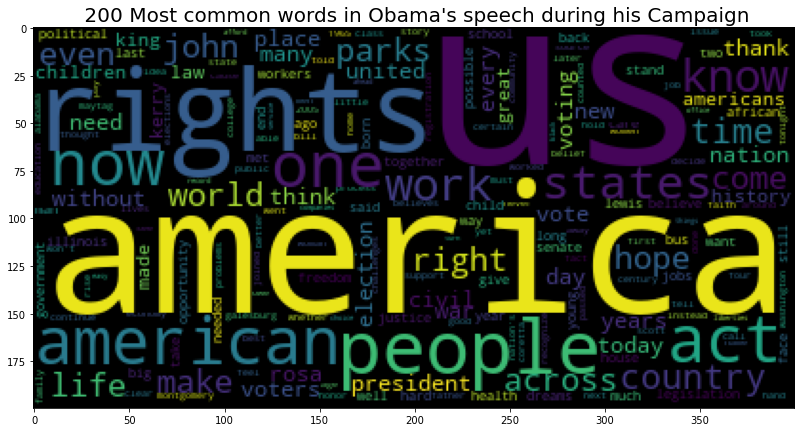

In [ ]:
tokens= [tokenizer.tokenize(x.lower()) for x in cmpn_tm.content]
tokens_no_stopwords= [token for x in tokens for token in x if token not in STOPWORDS]
word_count= Counter(tokens_no_stopwords)
word_count.most_common(20)
print( " Common: \n", word_count.most_common(20) )

rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud()
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 7));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's speech during his Campaign", fontdict= {'fontsize': 20, 'verticalalignment': 'baseline'});

During the initital days of campaign, Obama spoke about "America", stressing on "us", and the "rights" of people.

To be noted, tht word "president" did not occur very frequently, though it was present.

 Common: 
 [('people', 776), ('us', 660), ('now', 520), ('one', 489), ('know', 455), ('new', 438), ('world', 436), ('america', 426), ('time', 424), ('must', 409), ('president', 397), ('american', 376), ('health', 349), ('make', 345), ('care', 320), ('work', 319), ('many', 311), ('want', 291), ('states', 287), ('country', 284)]


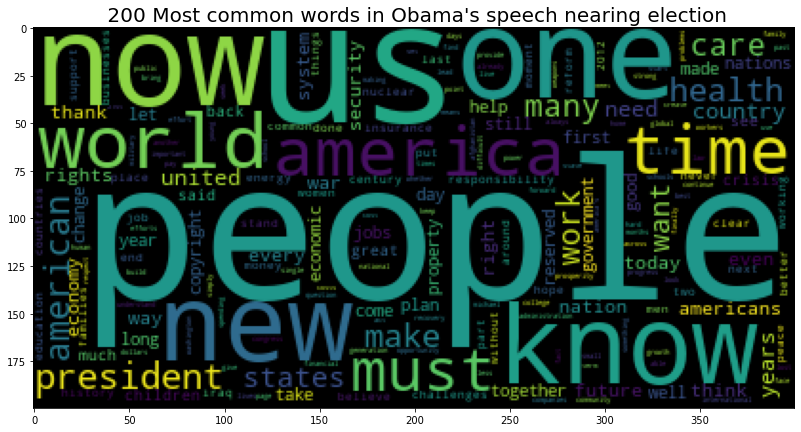

In [ ]:
new_stpwrds= ["q", "e", "yet", "seen", "sure"] 
[STOPWORDS.add(n) for n in new_stpwrds]
tokens= [tokenizer.tokenize(x.lower()) for x in elc_tm.content]
tokens_no_stopwords= [token for x in tokens for token in x if token not in STOPWORDS]
word_count= Counter(tokens_no_stopwords)
print( " Common: \n", word_count.most_common(20) )

rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud()
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 7));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's speech nearing election", fontdict= {'fontsize': 20, 'verticalalignment': 'baseline'});

Nearing election, we see that, there has not been much change in his speeches, as the words "people", "America" still frequented his speeches. He talked about the "world" and the "war" happening in "Iraq" and "Iran". His speech also contained "women" and the "health" of the people.

To note now, the word "president" has moved up in importance in his speeches.

 Common: 
 [('people', 6315), ('us', 4442), ('president', 3846), ('now', 3465), ('one', 3304), ('make', 3265), ('think', 3029), ('want', 2856), ('world', 2616), ('know', 2596), ('work', 2492), ('time', 2410), ('states', 2369), ('united', 2329), ('right', 2291), ('country', 2218), ('america', 2183), ('years', 2166), ('american', 2162), ('new', 2141)]


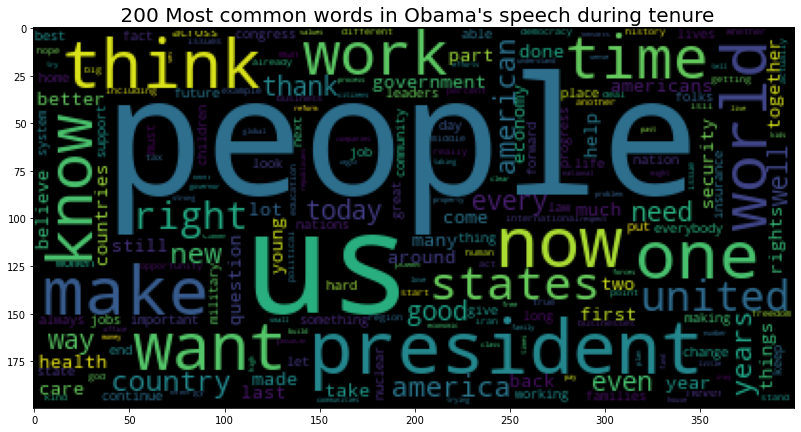

In [ ]:
new_stpwrds= ["without", "said", "see"] 
[STOPWORDS.add(n) for n in new_stpwrds]
tokens= [tokenizer.tokenize(x.lower()) for x in pres_tm.content]
tokens_no_stopwords= [token for x in tokens for token in x if token not in STOPWORDS]
word_count= Counter(tokens_no_stopwords)
print( " Common: \n", word_count.most_common(20) )

rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud()
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 7));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's speech during tenure", fontdict= {'fontsize': 20, 'verticalalignment': 'baseline'});

Even during his tenure, Obama concentrated for the "people", asking them to "now" "think". Apart from "international" situations frequenting his speeches, we see that, he also talked about "family", and "love". Since this collection consists of speeches after his selection as the president, the word "thank" als frequented.

## Lexical Diversity

It is the ratio of total number of words to the number of different unique word stems.

In [51]:
lex_div= len(set(tokens_no_stopwords_all))/len(tokens_no_stopwords_all)* 100
print(" The lexical diversity of the speeches: ", lex_div)

 The lexical diversity of the speeches:  3.4366067569263374


The lexical diversity denotes that, there was quite a variety in Obama's speehes. Though a few words frequented in his speeches, like "people", "America",  but in his tenure, he attended to a lot of other factors.

# Sentiment Analysis

Let us now add a sentiment score for each of the speeches of Obama

In [9]:
sid= SentimentIntensityAnalyzer()
spch_df['score']= spch_df.content.apply(lambda rv: sid.polarity_scores(rv) )

In [10]:
spch_df.head()

,date,header,content,score
0,27 Jul 2004,2004 DNC Address,"on behalf of the great state of illinois, cro...","{'neg': 0.077, 'neu': 0.739, 'pos': 0.183, 'co..."
1,06 Jan 2005,Senate Speech on Ohio Electoral Vote,"senator obama: thank you very much, mr presid...","{'neg': 0.07, 'neu': 0.812, 'pos': 0.118, 'com..."
2,04 Jun 2005,Knox College Commencement,"good morning president taylor, board of trust...","{'neg': 0.072, 'neu': 0.797, 'pos': 0.131, 'co..."
3,25 Oct 2005,Rosa Parks,"mr president, today the nation mourns a genui...","{'neg': 0.094, 'neu': 0.776, 'pos': 0.13, 'com..."
4,15 Dec 2005,Senate Floor Speech on the Patriot Act,"thank you very much, mr president you know, f...","{'neg': 0.109, 'neu': 0.764, 'pos': 0.127, 'co..."


In [11]:
spch_df['compound_score']= spch_df.score.apply(lambda scr:scr['compound'])

In [12]:
spch_df['sentiment']= spch_df.compound_score.apply(lambda c: 'pos' if c> 0 else('neg' if c< 0 else 'neutral') )

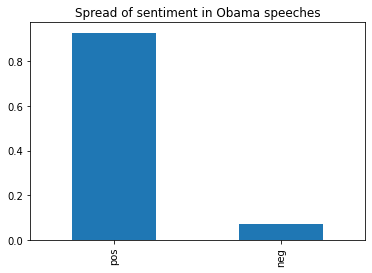

In [62]:
(spch_df.sentiment.value_counts()/ len(spch_df) ).plot(kind= 'bar', title= 'Spread of sentiment in Obama speeches');

So we see that, overall, in most his speeches Obama had a positive outlook.

Let's have a look at the negative sentiments.

In [13]:
spch_df[spch_df.sentiment== 'neg']['header']

9               Senate Speech Iraq Federalism Amendment
32                                 Lincoln Bicentennial
45                  National Security National Archives
153                                  Dangers of Default
175                  National Holocaust Memorial Museum
197                                Gun Violence Presser
200                          Gun Violence Exec Order 23
209                                 Gun Violence Denver
214                        Senate Vote Background Check
224    Drones and Terrorism National Defense University
237                          Syria Speech to the Nation
277                United Nations General Assembly 2014
278                United Nations Security Council 2014
295                    ISIL Force Authorization Request
314                  South Carolina AME Church Shooting
336                  Umpqua Community College Shootings
342                                         G-20 Turkey
348                Oval Office Counter Terrorism

As we can gauge from the headers of the documents, the speeches which have been tagged as negative, are the ones, where Obama talks about wars, guns and memorial. So there ought to come up negative feelings on those.

 Common: 
 [('isil', 5), ('national', 4), ('gun', 4), ('violence', 4), ('address', 4), ('security', 3), ('memorial', 3), ('senate', 2), ('speech', 2), ('presser', 2), ('terrorism', 2), ('united', 2), ('nations', 2), ('2014', 2), ('council', 2), ('community', 2), ('shootings', 2), ('counter', 2), ('update', 2), ('weekly', 2)]


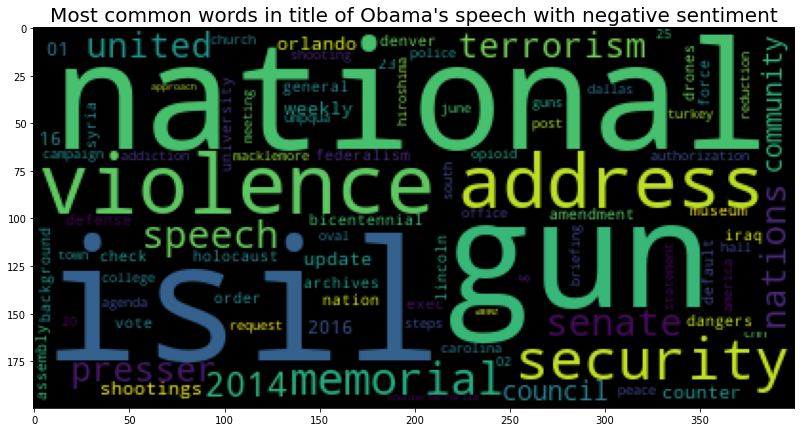

In [20]:
'''new_stpwrds= ["will", "there's", "that's", 'going', "it's", ] 
[STOPWORDS.add(n) for n in new_stpwrds]'''
tokens_sent= [tokenizer.tokenize(x.lower()) for x in spch_df[spch_df.sentiment== 'neg']['header']]
tokens_no_stopwords= [token for x in tokens_sent for token in x if token not in STOPWORDS]
word_count= Counter(tokens_no_stopwords)
print( " Common: \n", word_count.most_common(20) )

rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud(random_state= 125)
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 7));
plt.imshow(wc);
plt.title("Most common words in title of Obama's speech with negative sentiment", fontdict= {'fontsize': 20, 'verticalalignment': 'baseline'});

 Common: 
 [('people', 467), ('us', 380), ('gun', 273), ('isil', 257), ('president', 247), ('now', 231), ('one', 220), ('make', 216), ('know', 194), ('time', 183), ('want', 179), ('war', 176), ('world', 170), ('that’s', 165), ('american', 161), ('country', 158), ('think', 158), ('we’re', 157), ('united', 154), ('states', 153)]


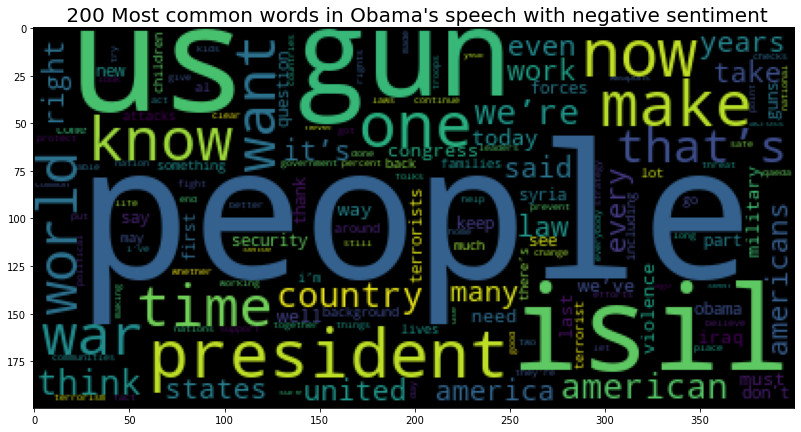

In [18]:
new_stpwrds= ["will", "there's", "that's", 'going', "it's", ] 
[STOPWORDS.add(n) for n in new_stpwrds]
tokens_sent= [tokenizer.tokenize(x.lower()) for x in spch_df[spch_df.sentiment== 'neg']['content']]
tokens_no_stopwords= [token for x in tokens_sent for token in x if token not in STOPWORDS]
word_count= Counter(tokens_no_stopwords)
print( " Common: \n", word_count.most_common(20) )

rvw_cmn= dict(word_count.most_common(200))
wc= WordCloud(random_state= 125)
wc.generate_from_frequencies(rvw_cmn);
plt.subplots(figsize= (15, 7));
plt.imshow(wc);
plt.title(" 200 Most common words in Obama's speech with negative sentiment", fontdict= {'fontsize': 20, 'verticalalignment': 'baseline'});

As we had anticipated from the title of the speeches, negative sentiment appears in speeches where Obama talked about gun, isil, war, to name a few.